Prediccion de anomalias con LSTM

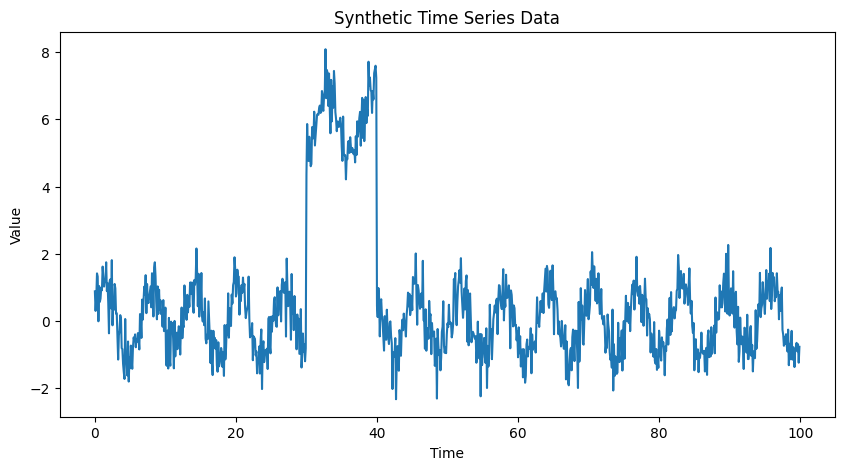

In [1]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(0)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

# Introduce anomalies
data[300:400] = data[300:400] + 6

import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time, data)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [2]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshaping for LSTM


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.fit(X, y, epochs=30, verbose=1)


Epoch 1/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4468
Epoch 2/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4419
Epoch 3/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4439
Epoch 4/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4308
Epoch 5/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4325
Epoch 6/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4286
Epoch 7/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4259
Epoch 8/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4446
Epoch 9/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4307
Epoch 10/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4287
Epoch 11/30
31/31 [==============================] - 0s 2ms/step - loss: 0.4302
Epoch 12/30
31/31 [==============================] - 0s 3ms/step - loss: 0.4247
Epoch 13/30
31/31 [==============================

31/31 [==============================] - 0s 851us/step


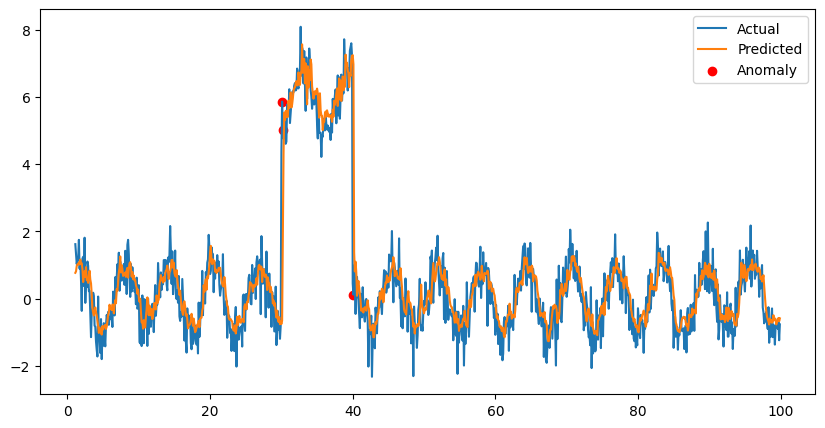

In [9]:
# Predict using the LSTM model
predictions = model.predict(X).flatten()

# Compute errors between actual and predicted values
errors = np.abs(predictions - y)

# Calculate mean and standard deviation of the error
mean_error = np.mean(errors)
std_error = np.std(errors)

# Define a threshold for anomaly detection
threshold = mean_error + 0.3 * std_error

# Identify where errors exceed the threshold
anomalies = errors > threshold

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time[seq_length+1:], data[seq_length+1:], label='Actual')
plt.plot(time[seq_length+1:], predictions, label='Predicted')
plt.scatter(time[seq_length+1:][anomalies], data[seq_length+1:][anomalies], color='r', label='Anomaly')
plt.legend()
plt.show()


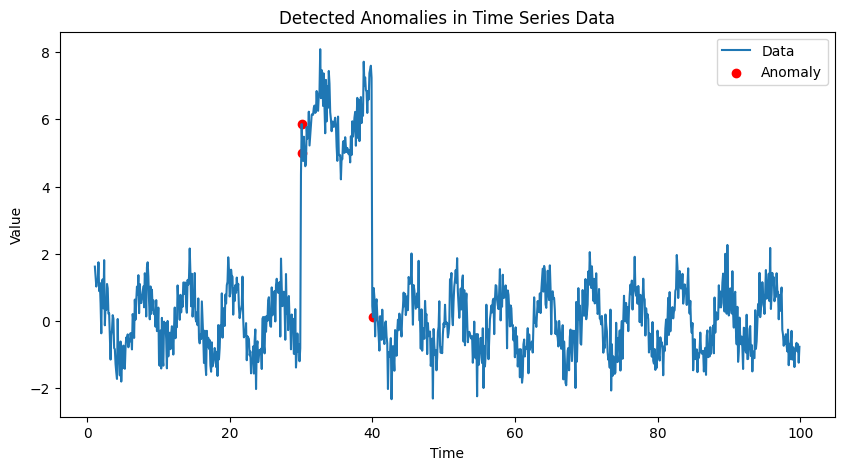

In [10]:
import matplotlib.pyplot as plt

# Plot only anomalies on the time series data
plt.figure(figsize=(10, 5))
plt.plot(time[seq_length+1:], data[seq_length+1:], label='Data')
plt.scatter(time[seq_length+1:][anomalies], data[seq_length+1:][anomalies], color='red', label='Anomaly')
plt.title("Detected Anomalies in Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()
